### Importing Modules

In [164]:
import numpy as np
import pandas as pd
import datetime
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn import datasets, linear_model, metrics
from matplotlib import pyplot

### Loading the dataset

In [167]:
train = pd.read_csv("/content/train.csv")
test = pd.read_csv('/content/test.csv')

In [168]:
train.head()

,Product_id,Stall_no,instock_date,Market_Category,Customer_name,Loyalty_customer,Product_Category,Grade,Demand,Discount_avail,charges_1,charges_2 (%),Minimum_price,Maximum_price,Selling_Price
0,BRAE2NF6JA5GUEXG,37.0,2015-08-22 18:36:12.000,2,Lillyann,Yes,Fashion,1,68,0.0,376.0,11.0,2983.0,4713.0,4185.947700
1,TUNE8SFB6RJN2HSD,38.0,2016-03-27 21:19:13.000,24,Klynn,Yes,Fashion,0,51,0.0,397.0,12.0,7495.0,10352.0,9271.490256
2,BRAEAR7WZPQGPBZU,9.0,2015-08-18 19:25:22.000,447,Ridge,Yes,Child_care,0,10,0.0,250.0,9.0,5752.0,7309.0,6785.701362
3,WATDZ2ZQ8JPDHCTJ,50.0,2016-03-28 21:53:01.000,23,Abran,Yes,Educational,2,48,0.0,144.0,13.0,5090.0,20814.0,13028.917824
4,JWSEBUKYQPMBZ3RK,7.0,2016-03-29 22:58:53.000,63,Dustyn,Yes,Repair,1,35,1.0,211.0,4.0,2430.0,9261.0,906.553935


In [169]:
train.dtypes

Product_id           object
Stall_no            float64
instock_date         object
Market_Category       int64
Customer_name        object
Loyalty_customer     object
Product_Category     object
Grade                 int64
Demand                int64
Discount_avail      float64
charges_1           float64
charges_2 (%)       float64
Minimum_price       float64
Maximum_price       float64
Selling_Price       float64
dtype: object

#### New Features using datetime from 'instock_date'

In [170]:
# For train data
train['instock_date']= pd.to_datetime(train['instock_date'])
train['year'] = train['instock_date'].dt.year
train['month'] =  train['instock_date'].dt.month
train['quarter'] = train['instock_date'].dt.quarter
train['day of the week'] = train['instock_date'].dt.dayofweek # Monday = 0 & Sunday = 6
# train['dayofweek_name'] = train['instock_date'].dt.day_name()
#train["week_of_the_year"] =  train['instock_date'].dt.weekofyear
train['Dayofyear'] = train['instock_date'].dt.dayofyear
train["hour"] = train['instock_date'].dt.hour


In [171]:
# For test data
test['instock_date']= pd.to_datetime(test['instock_date'])
test['year'] = test['instock_date'].dt.year
test['month'] =  test['instock_date'].dt.month
test['quarter'] = test['instock_date'].dt.quarter
test['day of the week'] = test['instock_date'].dt.dayofweek # Monday = 0 & Sunday = 6
# train['dayofweek_name'] = train['instock_date'].dt.day_name()
#train["week_of_the_year"] =  train['instock_date'].dt.weekofyear
test['Dayofyear'] = test['instock_date'].dt.dayofyear
test["hour"] = test['instock_date'].dt.hour

In [172]:
train.head()

,Product_id,Stall_no,instock_date,Market_Category,Customer_name,Loyalty_customer,Product_Category,Grade,Demand,Discount_avail,charges_1,charges_2 (%),Minimum_price,Maximum_price,Selling_Price,year,month,quarter,day of the week,Dayofyear,hour
0,BRAE2NF6JA5GUEXG,37.0,2015-08-22 18:36:12,2,Lillyann,Yes,Fashion,1,68,0.0,376.0,11.0,2983.0,4713.0,4185.947700,2015,8,3,5,234,18
1,TUNE8SFB6RJN2HSD,38.0,2016-03-27 21:19:13,24,Klynn,Yes,Fashion,0,51,0.0,397.0,12.0,7495.0,10352.0,9271.490256,2016,3,1,6,87,21
2,BRAEAR7WZPQGPBZU,9.0,2015-08-18 19:25:22,447,Ridge,Yes,Child_care,0,10,0.0,250.0,9.0,5752.0,7309.0,6785.701362,2015,8,3,1,230,19
3,WATDZ2ZQ8JPDHCTJ,50.0,2016-03-28 21:53:01,23,Abran,Yes,Educational,2,48,0.0,144.0,13.0,5090.0,20814.0,13028.917824,2016,3,1,0,88,21
4,JWSEBUKYQPMBZ3RK,7.0,2016-03-29 22:58:53,63,Dustyn,Yes,Repair,1,35,1.0,211.0,4.0,2430.0,9261.0,906.553935,2016,3,1,1,89,22


In [173]:
train.shape

(6368, 21)

In [174]:
train.corr()
  

,Stall_no,Market_Category,Grade,Demand,Discount_avail,charges_1,charges_2 (%),Minimum_price,Maximum_price,Selling_Price,year,month,quarter,day of the week,Dayofyear,hour
Stall_no,1.000000,-0.006145,-0.003449,0.004302,-0.019656,-0.010224,-0.004745,0.000123,0.008443,0.011733,0.014395,-0.014531,-0.015807,0.002488,-0.011779,-0.009561
Market_Category,-0.006145,1.000000,-0.036346,-0.018800,-0.003306,0.019009,0.024154,0.194787,0.134257,0.138711,-0.153502,0.088342,0.110840,0.069146,0.079883,-0.045670
Grade,-0.003449,-0.036346,1.000000,0.010107,-0.025232,-0.025316,-0.016644,-0.079583,0.164350,0.086450,0.026413,-0.032201,-0.037686,-0.021275,-0.031857,0.032671
Demand,0.004302,-0.018800,0.010107,1.000000,0.010230,-0.007370,0.017653,0.010283,0.003987,-0.000601,-0.008687,0.013748,0.017786,0.011331,0.013006,-0.018907
Discount_avail,-0.019656,-0.003306,-0.025232,0.010230,1.000000,-0.003899,0.018905,0.009817,-0.003918,-0.512457,0.134833,-0.085760,-0.068804,-0.015543,-0.095355,-0.118714
charges_1,-0.010224,0.019009,-0.025316,-0.007370,-0.003899,1.000000,0.270625,0.019448,0.012169,0.053045,-0.014331,0.010949,0.011610,-0.004165,0.010389,0.007534
charges_2 (%),-0.004745,0.024154,-0.016644,0.017653,0.018905,0.270625,1.000000,0.005448,0.009816,0.009031,-0.000971,-0.007235,-0.005645,-0.002125,-0.008463,-0.008391
Minimum_price,0.000123,0.194787,-0.079583,0.010283,0.009817,0.019448,0.005448,1.000000,0.708038,0.700444,0.057309,-0.013256,-0.009925,0.006299,-0.012666,-0.057089
Maximum_price,0.008443,0.134257,0.164350,0.003987,-0.003918,0.012169,0.009816,0.708038,1.000000,0.766928,0.179151,-0.112665,-0.128059,-0.066453,-0.104533,-0.000129
Selling_Price,0.011733,0.138711,0.086450,-0.000601,-0.512457,0.053045,0.009031,0.700444,0.766928,1.000000,0.061454,-0.026448,-0.037979,-0.033868,-0.018124,0.030152


In [175]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6368 entries, 0 to 6367
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Product_id        6368 non-null   object        
 1   Stall_no          6363 non-null   float64       
 2   instock_date      6368 non-null   datetime64[ns]
 3   Market_Category   6368 non-null   int64         
 4   Customer_name     6157 non-null   object        
 5   Loyalty_customer  6368 non-null   object        
 6   Product_Category  6368 non-null   object        
 7   Grade             6368 non-null   int64         
 8   Demand            6368 non-null   int64         
 9   Discount_avail    6330 non-null   float64       
 10  charges_1         6170 non-null   float64       
 11  charges_2 (%)     6163 non-null   float64       
 12  Minimum_price     6330 non-null   float64       
 13  Maximum_price     6025 non-null   float64       
 14  Selling_Price     6327 n

In [176]:
for col in train.columns:
  print(col,train[col].nunique())

Product_id 6368
Stall_no 50
instock_date 5350
Market_Category 248
Customer_name 5900
Loyalty_customer 2
Product_Category 10
Grade 4
Demand 100
Discount_avail 2
charges_1 487
charges_2 (%) 17
Minimum_price 4236
Maximum_price 4618
Selling_Price 6321
year 3
month 11
quarter 4
day of the week 7
Dayofyear 214
hour 24


In [177]:
# Finding number of null values in each column
train.isnull().sum()


Product_id            0
Stall_no              5
instock_date          0
Market_Category       0
Customer_name       211
Loyalty_customer      0
Product_Category      0
Grade                 0
Demand                0
Discount_avail       38
charges_1           198
charges_2 (%)       205
Minimum_price        38
Maximum_price       343
Selling_Price        41
year                  0
month                 0
quarter               0
day of the week       0
Dayofyear             0
hour                  0
dtype: int64

In [178]:
# Excluding rows where train['Selling_Price'] is null
train = train[train['Selling_Price'].notna()]


In [179]:
# Replacing null values
train['Customer_name'] = train['Customer_name'].fillna(train['Customer_name'].mode()[0])



In [180]:
# After applying Label Encoding –
from sklearn import preprocessing 
label_encoder = preprocessing.LabelEncoder() 

# Encode labels in column 'Customer_name'. 
train['Customer_name']= label_encoder.fit_transform(train['Customer_name']) 

# Encode labels in column 'Loyalty_customer'. 
train['Loyalty_customer']= label_encoder.fit_transform(train['Loyalty_customer']) 

# Encode labels in column 'Product_Category'. 
train['Product_Category']= label_encoder.fit_transform(train['Product_Category']) 





In [185]:
train.Customer_name.nunique()

5867

In [190]:
train.head()

,Product_id,Stall_no,instock_date,Market_Category,Customer_name,Loyalty_customer,Product_Category,Grade,Demand,Discount_avail,charges_1,charges_2 (%),Minimum_price,Maximum_price,Selling_Price,year,month,quarter,day of the week,Dayofyear,hour
0,BRAE2NF6JA5GUEXG,37.0,2015-08-22 18:36:12,2,3706,1,3,1,68,0.0,376.0,11.0,2983.0,4713.0,4185.947700,2015,8,3,5,234,18
1,TUNE8SFB6RJN2HSD,38.0,2016-03-27 21:19:13,24,3427,1,3,0,51,0.0,397.0,12.0,7495.0,10352.0,9271.490256,2016,3,1,6,87,21
2,BRAEAR7WZPQGPBZU,9.0,2015-08-18 19:25:22,447,4790,1,0,0,10,0.0,250.0,9.0,5752.0,7309.0,6785.701362,2015,8,3,1,230,19
3,WATDZ2ZQ8JPDHCTJ,50.0,2016-03-28 21:53:01,23,67,1,2,2,48,0.0,144.0,13.0,5090.0,20814.0,13028.917824,2016,3,1,0,88,21
4,JWSEBUKYQPMBZ3RK,7.0,2016-03-29 22:58:53,63,1740,1,8,1,35,1.0,211.0,4.0,2430.0,9261.0,906.553935,2016,3,1,1,89,22


In [32]:
train.Stall_no.describe()

count    6322.000000
mean       25.312243
std        14.331376
min         1.000000
25%        13.000000
50%        25.000000
75%        37.000000
max        50.000000
Name: Stall_no, dtype: float64

In [193]:
train['Selling_Price'] = train['Selling_Price'].abs()


In [194]:
train.Selling_Price.describe()

count     6327.000000
mean      4580.406478
std       2952.640478
min          4.000000
25%       2461.805312
50%       4215.972992
75%       6167.643252
max      22638.325941
Name: Selling_Price, dtype: float64

In [36]:
train['Loyalty_customer'].unique()

array([1, 0])

In [ ]:
train.Discount_avail.unique()

array([ 0.,  1., nan])

In [195]:
train['Discount_avail'] = train['Discount_avail'].fillna(train['Discount_avail'].mean())
train['charges_1'] = train['charges_1'].fillna(train['charges_1'].mean())
train['charges_2 (%)'] = train['charges_2 (%)'].fillna(train['charges_2 (%)'].mean())
train['Minimum_price'] = train['Minimum_price'].fillna(train['Minimum_price'].mean())
train['Maximum_price'] = train['Maximum_price'].fillna(train['Maximum_price'].mean())
train['Stall_no'] = train['Stall_no'].fillna(train['Stall_no'].median())


In [196]:
train.isnull().sum()


Product_id          0
Stall_no            0
instock_date        0
Market_Category     0
Customer_name       0
Loyalty_customer    0
Product_Category    0
Grade               0
Demand              0
Discount_avail      0
charges_1           0
charges_2 (%)       0
Minimum_price       0
Maximum_price       0
Selling_Price       0
year                0
month               0
quarter             0
day of the week     0
Dayofyear           0
hour                0
dtype: int64

In [201]:
train.head()

,Product_id,Stall_no,instock_date,Market_Category,Customer_name,Loyalty_customer,Product_Category,Grade,Demand,Discount_avail,charges_1,charges_2 (%),Minimum_price,Maximum_price,Selling_Price,year,month,quarter,day of the week,Dayofyear,hour
0,BRAE2NF6JA5GUEXG,37.0,2015-08-22 18:36:12,2,3706,1,3,1,68,0.0,376.0,11.0,2983.0,4713.0,4185.947700,2015,8,3,5,234,18
1,TUNE8SFB6RJN2HSD,38.0,2016-03-27 21:19:13,24,3427,1,3,0,51,0.0,397.0,12.0,7495.0,10352.0,9271.490256,2016,3,1,6,87,21
2,BRAEAR7WZPQGPBZU,9.0,2015-08-18 19:25:22,447,4790,1,0,0,10,0.0,250.0,9.0,5752.0,7309.0,6785.701362,2015,8,3,1,230,19
3,WATDZ2ZQ8JPDHCTJ,50.0,2016-03-28 21:53:01,23,67,1,2,2,48,0.0,144.0,13.0,5090.0,20814.0,13028.917824,2016,3,1,0,88,21
4,JWSEBUKYQPMBZ3RK,7.0,2016-03-29 22:58:53,63,1740,1,8,1,35,1.0,211.0,4.0,2430.0,9261.0,906.553935,2016,3,1,1,89,22


### Feature Engineering

In [202]:
train['charges_1 (%)'] = train['charges_1'] /100
train['charges_2'] = train['charges_2 (%)'] *100
train["total_charges"]= train['charges_1']+train['charges_2']

In [203]:
train["range"] = train['Maximum_price']-train['Minimum_price']

In [204]:
train.head()

,Product_id,Stall_no,instock_date,Market_Category,Customer_name,Loyalty_customer,Product_Category,Grade,Demand,Discount_avail,charges_1,charges_2 (%),Minimum_price,Maximum_price,Selling_Price,year,month,quarter,day of the week,Dayofyear,hour,charges_1 (%),charges_2,total_charges,range
0,BRAE2NF6JA5GUEXG,37.0,2015-08-22 18:36:12,2,3706,1,3,1,68,0.0,376.0,11.0,2983.0,4713.0,4185.947700,2015,8,3,5,234,18,3.76,1100.0,1476.0,1730.0
1,TUNE8SFB6RJN2HSD,38.0,2016-03-27 21:19:13,24,3427,1,3,0,51,0.0,397.0,12.0,7495.0,10352.0,9271.490256,2016,3,1,6,87,21,3.97,1200.0,1597.0,2857.0
2,BRAEAR7WZPQGPBZU,9.0,2015-08-18 19:25:22,447,4790,1,0,0,10,0.0,250.0,9.0,5752.0,7309.0,6785.701362,2015,8,3,1,230,19,2.50,900.0,1150.0,1557.0
3,WATDZ2ZQ8JPDHCTJ,50.0,2016-03-28 21:53:01,23,67,1,2,2,48,0.0,144.0,13.0,5090.0,20814.0,13028.917824,2016,3,1,0,88,21,1.44,1300.0,1444.0,15724.0
4,JWSEBUKYQPMBZ3RK,7.0,2016-03-29 22:58:53,63,1740,1,8,1,35,1.0,211.0,4.0,2430.0,9261.0,906.553935,2016,3,1,1,89,22,2.11,400.0,611.0,6831.0


###  Split the dataset into training and testing

In [205]:
train =train.drop(["instock_date","Product_id"],axis =1)


In [269]:
x = train
x = x.drop(["Selling_Price"],axis =1)
y = train['Selling_Price']

In [207]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state =40)

In [270]:
x.shape,y.shape

((6327, 22), (6327,))

In [268]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(4428, 22)
(4428,)
(1899, 22)
(1899,)


### Model Building

#### Linear Regression

In [209]:
from sklearn.linear_model import LinearRegression
reg = linear_model.LinearRegression()
reg.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [210]:
prediction_reg_training = reg.predict(x_train)
prediction_reg = reg.predict(x_test)
prediction_reg = pd.DataFrame(prediction_reg)

In [211]:
from sklearn.metrics import mean_squared_error 
print(mean_squared_error(y_test, prediction_reg)**0.5)

772.2650684769981


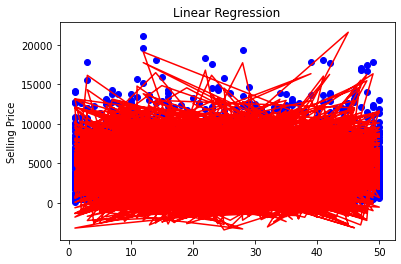

In [212]:
# Visualising the Linear Regression results 
plt.scatter(x_train.iloc[:,0].values, y_train.values, color = 'blue')

  
plt.plot(x_train.iloc[:,0].values, prediction_reg_training, color = 'red') 
plt.title('Linear Regression') 
plt.ylabel('Selling Price') 
  
plt.show() 

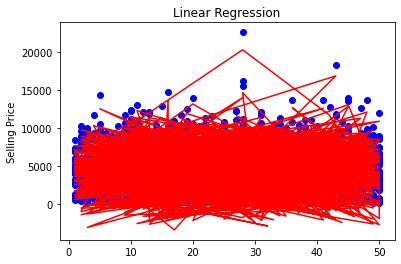

In [213]:
# Visualising the Linear Regression results 
plt.scatter(x_test.iloc[:,0].values, y_test.values, color = 'blue')
  
plt.plot(x_test.iloc[:,0].values, prediction_reg.values, color = 'red') 
plt.title('Linear Regression') 
plt.ylabel('Selling Price') 
  
plt.show() 

In [ ]:
 prediction_reg

,0
0,994.214180
1,5384.347925
2,4109.182867
3,798.351527
4,5751.822039
...,...
1894,4018.319983
1895,7374.614429
1896,4161.893153
1897,5968.202032


In [ ]:
y_pred = pd.DataFrame(y_pred)
y_pred

,0
0,0.179911
1,0.367428
2,0.312961
3,0.171545
4,0.383124
...,...
1894,0.309080
1895,0.452439
1896,0.315213
1897,0.392366


In [ ]:
y_test

4315     820.193947
5677    5609.860200
2606    4065.383421
5081     762.448005
3916    5935.126428
           ...     
1241    3582.670875
1063    7669.637850
5800    4079.176500
5626    6088.161123
4572    4580.681886
Name: Selling_Price, Length: 1899, dtype: float64

#### Decision Tree Regressor

In [214]:
from sklearn.tree import DecisionTreeRegressor  
# create a regressor object 
regressor = DecisionTreeRegressor()  
regressor.fit(x_train, y_train) 

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [215]:
pred_dt =regressor.predict(x_test) 
pred_dt = pd.DataFrame(pred_dt)

In [216]:
from sklearn.metrics import mean_squared_error 
print(mean_squared_error(y_test, pred_dt)**0.5)

447.4141394812788


Feature: 0, Score: 0.00020
Feature: 1, Score: 0.00023
Feature: 2, Score: 0.00168
Feature: 3, Score: 0.00001
Feature: 4, Score: 0.00028
Feature: 5, Score: 0.00181
Feature: 6, Score: 0.00090
Feature: 7, Score: 0.28977
Feature: 8, Score: 0.00069
Feature: 9, Score: 0.00042
Feature: 10, Score: 0.18969
Feature: 11, Score: 0.50148
Feature: 12, Score: 0.00000
Feature: 13, Score: 0.00005
Feature: 14, Score: 0.00013
Feature: 15, Score: 0.00092
Feature: 16, Score: 0.00006
Feature: 17, Score: 0.00019
Feature: 18, Score: 0.00205
Feature: 19, Score: 0.00014
Feature: 20, Score: 0.00053
Feature: 21, Score: 0.00878


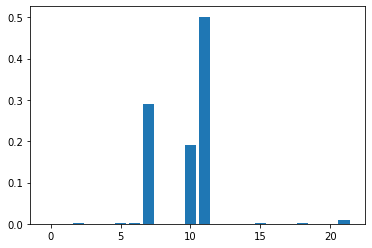

In [217]:
importance = regressor.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()


In [63]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4428 entries, 2949 to 3420
Data columns (total 33 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Stall_no                      4428 non-null   float64
 1   Market_Category               4428 non-null   int64  
 2   Customer_name                 4428 non-null   int64  
 3   Loyalty_customer              4428 non-null   int64  
 4   Grade                         4428 non-null   int64  
 5   Demand                        4428 non-null   int64  
 6   Discount_avail                4428 non-null   float64
 7   charges_1                     4428 non-null   float64
 8   charges_2 (%)                 4428 non-null   float64
 9   Minimum_price                 4428 non-null   float64
 10  Maximum_price                 4428 non-null   float64
 11  year                          4428 non-null   int64  
 12  month                         4428 non-null   int64  
 13  

In [271]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import RandomForestRegressor
import xgboost
from sklearn.ensemble import VotingRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from lightgbm import LGBMRegressor
from sklearn.linear_model import ElasticNet
from sklearn.ensemble import StackingRegressor
#Evalution Metrix
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_validate
from sklearn.metrics import mean_squared_error

In [272]:
gbr = GradientBoostingRegressor(random_state=0)
xgb = xgboost.XGBRegressor(n_jobs=-1)
et = ExtraTreesRegressor(n_jobs=-1)
rf = RandomForestRegressor(n_jobs=-1)
ds = DecisionTreeRegressor()

In [273]:
reg = {
"LinearRegression": LinearRegression(),
"KNeighborsRegressor":KNeighborsRegressor(n_neighbors=2),
"AdaBoostRegressor":AdaBoostRegressor(random_state=0, n_estimators=100),
"LGBMRegressor":LGBMRegressor(),
"Ridge": Ridge(alpha=1.0),
"ElasticNet":ElasticNet(random_state=0),
"GradientBoostingRegressor":GradientBoostingRegressor(random_state=0),
"DecisionTreeRegressor": DecisionTreeRegressor(),
"ExtraTreesRegressor": ExtraTreesRegressor(n_jobs=-1),
"RandomForestRegressor": RandomForestRegressor(n_jobs=-1),
"XGBRegressor":xgboost.XGBRegressor(n_jobs=-1)
}


In [274]:
%%time
dic =  {"Model":[],"R2_Train":[],"RMSE_Train":[]}
for name, model in reg.items():

   
  model.fit(x_train, y_train)
  y_train_pre = model.predict(x_test)
  r2 = r2_score(y_test, y_train_pre)
  rmse  = np.sqrt(mean_squared_error(y_test, y_train_pre))
  print("--------------------------------------------------------------")
  print("Model:", name)
  print("-----Training Data Evalution-----")
  print("R2 Value: ", r2_score(y_test, y_train_pre))
  print("RMSE: ",np.sqrt(mean_squared_error(y_test, y_train_pre)))
  dic["Model"].append(name)
  dic["R2_Train"].append(r2)
  dic["RMSE_Train"].append(rmse)


--------------------------------------------------------------
Model: LinearRegression
-----Training Data Evalution-----
R2 Value:  0.9264617055358184
RMSE:  772.2650684769981
--------------------------------------------------------------
Model: KNeighborsRegressor
-----Training Data Evalution-----
R2 Value:  0.5066549308344905
RMSE:  2000.2533680469712
--------------------------------------------------------------
Model: AdaBoostRegressor
-----Training Data Evalution-----
R2 Value:  0.8660939523460852
RMSE:  1042.1007542509792
--------------------------------------------------------------
Model: LGBMRegressor
-----Training Data Evalution-----
R2 Value:  0.9910302760994496
RMSE:  269.7113059821462
--------------------------------------------------------------
Model: Ridge
-----Training Data Evalution-----
R2 Value:  0.9264950793292154
RMSE:  772.0898105391178
--------------------------------------------------------------
Model: ElasticNet
-----Training Data Evalution-----
R2 Value:  0.

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2494028126.3352985, tolerance: 3973437.5057197907
  positive)


--------------------------------------------------------------
Model: GradientBoostingRegressor
-----Training Data Evalution-----
R2 Value:  0.9878056689956347
RMSE:  314.47679454887094
--------------------------------------------------------------
Model: DecisionTreeRegressor
-----Training Data Evalution-----
R2 Value:  0.9735348927626192
RMSE:  463.28308451451517
--------------------------------------------------------------
Model: ExtraTreesRegressor
-----Training Data Evalution-----
R2 Value:  0.9929305363691191
RMSE:  239.4433867667961
--------------------------------------------------------------
Model: RandomForestRegressor
-----Training Data Evalution-----
R2 Value:  0.991830270008379
RMSE:  257.40291811762404
[06:37:57] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
--------------------------------------------------------------
Model: XGBRegressor
-----Training Data Evalution-----
R2 Value:  0.988464608276502

In [275]:
final_data = pd.DataFrame(dic)
final_data

,Model,R2_Train,RMSE_Train
0,LinearRegression,0.926462,772.265068
1,KNeighborsRegressor,0.506655,2000.253368
2,AdaBoostRegressor,0.866094,1042.100754
3,LGBMRegressor,0.991030,269.711306
4,Ridge,0.926495,772.089811
5,ElasticNet,0.750012,1423.865375
6,GradientBoostingRegressor,0.987806,314.476795
7,DecisionTreeRegressor,0.973535,463.283085
8,ExtraTreesRegressor,0.992931,239.443387
9,RandomForestRegressor,0.991830,257.402918


In [276]:
final_data.sort_values("RMSE_Train", axis = 0, ascending = True)

,Model,R2_Train,RMSE_Train
8,ExtraTreesRegressor,0.992931,239.443387
9,RandomForestRegressor,0.991830,257.402918
3,LGBMRegressor,0.991030,269.711306
10,XGBRegressor,0.988465,305.862186
6,GradientBoostingRegressor,0.987806,314.476795
7,DecisionTreeRegressor,0.973535,463.283085
4,Ridge,0.926495,772.089811
0,LinearRegression,0.926462,772.265068
2,AdaBoostRegressor,0.866094,1042.100754
5,ElasticNet,0.750012,1423.865375


In [277]:
%%time

model = VotingRegressor([('et', et),('rf',rf)],n_jobs=-1)

model.fit(x_train,y_train)

y_pred = model.predict(x_test)
r2_test = r2_score(y_test, y_pred)
rmse_test  = np.sqrt(mean_squared_error(y_test, y_pred))
print("R2 Value: ", r2_test)
print("RMSE: ",rmse_test)

R2 Value:  0.9923444697731341
RMSE:  249.17086059741843
CPU times: user 375 ms, sys: 241 ms, total: 616 ms
Wall time: 7.66 s


In [335]:
%%time

model = VotingRegressor([('et', et),('rf',rf)],n_jobs=-1)

model.fit(x,y)

y_pred = model.predict(x)
r2_test = r2_score(y, y_pred)
rmse_test  = np.sqrt(mean_squared_error(y, y_pred))
print("R2 Value: ", r2_test)
print("RMSE: ",rmse_test)

R2 Value:  0.9996079663080688
RMSE:  58.45719091671143
CPU times: user 666 ms, sys: 481 ms, total: 1.15 s
Wall time: 11.1 s


In [260]:
%%time

model = VotingRegressor([('et', et),('rf',rf)],n_jobs=-1)

model.fit(x_train_et,y_train)

y_pred = model.predict(x_test_et)
r2_test = r2_score(y_test, y_pred)
rmse_test  = np.sqrt(mean_squared_error(y_test, y_pred))
print("R2 Value: ", r2_test)
print("RMSE: ",rmse_test)

R2 Value:  0.9916594217238592
RMSE:  260.0804426656285
CPU times: user 303 ms, sys: 274 ms, total: 577 ms
Wall time: 3.89 s


#### Randomforest regression

In [278]:
from sklearn.ensemble import RandomForestRegressor 
# create regressor object 
reg_rf = RandomForestRegressor() 

# fit the regressor with x and y data 
reg_rf.fit(x, y)


RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [284]:
pred_rf = reg_rf.predict(x)
pred_rf = pd.DataFrame(pred_rf)

In [285]:
from sklearn.metrics import mean_squared_error 
print(mean_squared_error(y, pred_rf)**0.5)

120.39851017134657


Feature: 0, Score: 0.00041
Feature: 1, Score: 0.00054
Feature: 2, Score: 0.00089
Feature: 3, Score: 0.00005
Feature: 4, Score: 0.00032
Feature: 5, Score: 0.00191
Feature: 6, Score: 0.00065
Feature: 7, Score: 0.29460
Feature: 8, Score: 0.00087
Feature: 9, Score: 0.00019
Feature: 10, Score: 0.14078
Feature: 11, Score: 0.55057
Feature: 12, Score: 0.00022
Feature: 13, Score: 0.00011
Feature: 14, Score: 0.00007
Feature: 15, Score: 0.00019
Feature: 16, Score: 0.00058
Feature: 17, Score: 0.00032
Feature: 18, Score: 0.00094
Feature: 19, Score: 0.00018
Feature: 20, Score: 0.00039
Feature: 21, Score: 0.00523


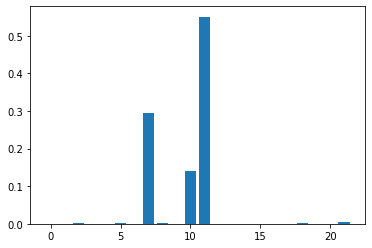

In [286]:
importance = reg_rf.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

###### Feature selection

In [ ]:
# Random selection by feature importance of random forest regressor
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import accuracy_score
sel = SelectFromModel(RandomForestRegressor(n_estimators=100,random_state=0,n_jobs=-1))
sel.fit(x,y)
sel.get_support()

array([False, False, False, False, False, False, False,  True, False,
       False,  True,  True, False, False, False, False, False, False,
       False, False, False, False, False, False, False])

In [ ]:
features = x_train.columns[sel.get_support()]
features

Index(['Discount_avail', 'Minimum_price', 'Maximum_price'], dtype='object')

In [ ]:
np.mean(sel.estimator_.feature_importances_)

0.04

In [ ]:
x_train_rfc = sel.transform(x_train)
x_test_rfc = sel.transform(x_test)

In [ ]:
clf = RandomForestRegressor(n_estimators=100,random_state=0,n_jobs =-1)
clf.fit(x_train_rfc,y_train)
y_pred =clf.predict(x_test_rfc)

In [ ]:
from sklearn.metrics import mean_squared_error 
print(mean_squared_error(y_test, y_pred)**0.5)

330.3313287145996


In [330]:
# Recursive Feature Elimination
from sklearn.feature_selection import RFE
sel2 = RFE(RandomForestRegressor(n_estimators=100,random_state=0,n_jobs=-1),n_features_to_select =10)
sel2.fit(x,y)

RFE(estimator=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                    criterion='mse', max_depth=None,
                                    max_features='auto', max_leaf_nodes=None,
                                    max_samples=None, min_impurity_decrease=0.0,
                                    min_impurity_split=None, min_samples_leaf=1,
                                    min_samples_split=2,
                                    min_weight_fraction_leaf=0.0,
                                    n_estimators=100, n_jobs=-1,
                                    oob_score=False, random_state=0, verbose=0,
                                    warm_start=False),
    n_features_to_select=10, step=1, verbose=0)

In [331]:
sel2.get_support()

array([False, False,  True, False, False,  True,  True,  True,  True,
       False,  True,  True, False, False, False, False,  True, False,
        True, False, False,  True])

In [332]:
features2 = x.columns[sel2.get_support()]
features2

Index(['Customer_name', 'Grade', 'Demand', 'Discount_avail', 'charges_1',
       'Minimum_price', 'Maximum_price', 'Dayofyear', 'charges_1 (%)',
       'range'],
      dtype='object')

In [333]:
x_train_rfe = sel2.transform(x)
# x_test_rfe = sel2.transform()
clf = RandomForestRegressor(n_estimators=100,random_state=0,n_jobs =-1)
clf.fit(x_train_rfe,y)
y_pred_rfe =clf.predict(x_train_rfe)
from sklearn.metrics import mean_squared_error 
print(mean_squared_error(y, y_pred_rfe)**0.5)

119.02369955438785


In [322]:
clf.fit(x_et,y)
y_pred_rfe =clf.predict(x_et)
from sklearn.metrics import mean_squared_error 
print(mean_squared_error(y, y_pred_rfe)**0.5)

126.41053564968644


In [233]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4428 entries, 2949 to 3420
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Stall_no          4428 non-null   float64
 1   Market_Category   4428 non-null   int64  
 2   Customer_name     4428 non-null   int64  
 3   Loyalty_customer  4428 non-null   int64  
 4   Product_Category  4428 non-null   int64  
 5   Grade             4428 non-null   int64  
 6   Demand            4428 non-null   int64  
 7   Discount_avail    4428 non-null   float64
 8   charges_1         4428 non-null   float64
 9   charges_2 (%)     4428 non-null   float64
 10  Minimum_price     4428 non-null   float64
 11  Maximum_price     4428 non-null   float64
 12  year              4428 non-null   int64  
 13  month             4428 non-null   int64  
 14  quarter           4428 non-null   int64  
 15  day of the week   4428 non-null   int64  
 16  Dayofyear         4428 non-null   int64

In [291]:
et.fit(x,y)

ExtraTreesRegressor(bootstrap=False, ccp_alpha=0.0, criterion='mse',
                    max_depth=None, max_features='auto', max_leaf_nodes=None,
                    max_samples=None, min_impurity_decrease=0.0,
                    min_impurity_split=None, min_samples_leaf=1,
                    min_samples_split=2, min_weight_fraction_leaf=0.0,
                    n_estimators=100, n_jobs=-1, oob_score=False,
                    random_state=None, verbose=0, warm_start=False)

Feature: 0, Score: 0.00055
Feature: 1, Score: 0.00067
Feature: 2, Score: 0.00075
Feature: 3, Score: 0.00042
Feature: 4, Score: 0.00051
Feature: 5, Score: 0.00370
Feature: 6, Score: 0.00057
Feature: 7, Score: 0.27936
Feature: 8, Score: 0.00105
Feature: 9, Score: 0.00039
Feature: 10, Score: 0.27640
Feature: 11, Score: 0.38793
Feature: 12, Score: 0.00128
Feature: 13, Score: 0.00048
Feature: 14, Score: 0.00084
Feature: 15, Score: 0.00056
Feature: 16, Score: 0.00093
Feature: 17, Score: 0.00045
Feature: 18, Score: 0.00098
Feature: 19, Score: 0.00041
Feature: 20, Score: 0.00048
Feature: 21, Score: 0.04128


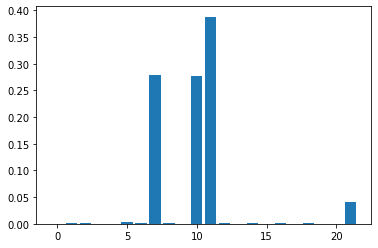

In [235]:
importance = et.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

In [292]:
sel3 = RFE(ExtraTreesRegressor(n_jobs=-1),n_features_to_select =5)
sel3.fit(x,y)
sel3.get_support()
features3 = x.columns[sel3.get_support()]
features3



Index(['Grade', 'Discount_avail', 'Minimum_price', 'Maximum_price', 'range'], dtype='object')

In [309]:
x_et = sel3.transform(x)
# x_test_et = sel3.transform(x_test)
et.fit(x_et,y)
y_pred_et =et.predict(x_et)
from sklearn.metrics import mean_squared_error 
print(mean_squared_error(y, y_pred_et)**0.5)

26.52528526568296


In [334]:
x_train_et = sel2.transform(x)
# x_test_et = sel2.transform(x_test)
et.fit(x_train_et,y)
y_pred_et =et.predict(x_train_et)
from sklearn.metrics import mean_squared_error 
print(mean_squared_error(y, y_pred_et)**0.5)

7.537067916155023e-12


In [ ]:
train.shape

(6327, 26)

### Test data

In [241]:
test.head()

,Product_id,Stall_no,instock_date,Market_Category,Customer_name,Loyalty_customer,Product_Category,Grade,Demand,Discount_avail,charges_1,charges_2 (%),Minimum_price,Maximum_price,year,month,quarter,day of the week,Dayofyear,hour
0,SCHE4YSTDVPVZVXW,39.0,2016-01-13 07:45:08,205,Ivanka,No,Fashion,0,90,0,380.0,16.0,2576.0,3340,2016,1,1,2,13,7
1,ACCEGCATKHNRXUHW,49.0,2015-08-23 20:37:05,3,Isaak,Yes,Fashion,0,87,0,393.0,16.0,1202.0,1955,2015,8,3,6,235,20
2,NKCE6GJ5XVJDXNNZ,1.0,2015-11-14 18:12:39,183,Analiese,No,Technology,2,55,0,493.0,9.0,7175.0,15715,2015,11,4,5,318,18
3,NKCEB8BK3ZXDHDHM,8.0,2015-11-21 04:56:19,358,Rusty,Yes,Child_care,3,86,0,303.0,16.0,5404.0,13078,2015,11,4,5,325,4
4,TOPEFDXSAHRNPF94,33.0,2015-05-06 15:09:46,167,Eloise,No,Technology,0,27,0,567.0,16.0,4069.0,6244,2015,5,2,2,126,15


In [122]:
# Finding number of null values in each column
test.isnull().sum()


Product_id                       0
Stall_no                         1
instock_date                     0
Market_Category                  0
Customer_name                   53
Loyalty_customer                 0
Product_Category                 0
Grade                            0
Demand                           0
Discount_avail                   0
charges_1                       36
charges_2 (%)                    5
Minimum_price                   14
Maximum_price                    0
year                             0
month                            0
quarter                          0
day of the week                  0
Dayofyear                        0
hour                             0
Product_Category_Cosmetics       0
Product_Category_Educational     0
Product_Category_Fashion         0
Product_Category_Home_decor      0
Product_Category_Hospitality     0
Product_Category_Organic         0
Product_Category_Pet_care        0
Product_Category_Repair          0
Product_Category_Tec

In [ ]:
# # Replacing null values
# test['products_per_customer'] = test['products_per_customer'].fillna(test['products_per_customer'].mode()[0])
# test['total_days_per_customer'] = test['total_days_per_customer'].fillna(test['total_days_per_customer'].mode()[0])
# test['Unique_days_per_customer'] = test['Unique_days_per_customer'].fillna(test['Unique_days_per_customer'].mode()[0])


In [123]:
test.Customer_name.value_counts()


Kayden      2
Kylan       2
Collins     2
Joan        2
Asa         2
           ..
Johanna     1
Kaelynn     1
Mattilyn    1
Nevaya      1
Nikole      1
Name: Customer_name, Length: 3319, dtype: int64

In [242]:
test['Customer_name'] = test['Customer_name'].fillna(test['Customer_name'].mode()[0])


In [ ]:
# test_dummies2 =pd.get_dummies(test.Product_Category)
# test_dummies3 =pd.get_dummies(test.year)
# test = pd.concat([test,test_dummies2,test_dummies3],axis =1)

In [129]:
test.head()

,Product_id,Stall_no,instock_date,Market_Category,Customer_name,Loyalty_customer,Product_Category,Grade,Demand,Discount_avail,charges_1,charges_2 (%),Minimum_price,Maximum_price,year,month,quarter,day of the week,Dayofyear,hour,Product_Category_Cosmetics,Product_Category_Educational,Product_Category_Fashion,Product_Category_Home_decor,Product_Category_Hospitality,Product_Category_Organic,Product_Category_Pet_care,Product_Category_Repair,Product_Category_Technology
0,SCHE4YSTDVPVZVXW,39.0,2016-01-13 07:45:08,205,1,0,Fashion,0,90,0,380.0,16.0,2576.0,3340,2016,1,1,2,13,7,0,0,1,0,0,0,0,0,0
1,ACCEGCATKHNRXUHW,49.0,2015-08-23 20:37:05,3,1,1,Fashion,0,87,0,393.0,16.0,1202.0,1955,2015,8,3,6,235,20,0,0,1,0,0,0,0,0,0
2,NKCE6GJ5XVJDXNNZ,1.0,2015-11-14 18:12:39,183,1,0,Technology,2,55,0,493.0,9.0,7175.0,15715,2015,11,4,5,318,18,0,0,0,0,0,0,0,0,1
3,NKCEB8BK3ZXDHDHM,8.0,2015-11-21 04:56:19,358,1,1,Child_care,3,86,0,303.0,16.0,5404.0,13078,2015,11,4,5,325,4,0,0,0,0,0,0,0,0,0
4,TOPEFDXSAHRNPF94,33.0,2015-05-06 15:09:46,167,1,0,Technology,0,27,0,567.0,16.0,4069.0,6244,2015,5,2,2,126,15,0,0,0,0,0,0,0,0,1


In [243]:
# After applying Label Encoding –
from sklearn import preprocessing 
label_encoder = preprocessing.LabelEncoder() 

# Encode labels in column 'Customer_name'. 
test['Customer_name']= label_encoder.fit_transform(test['Customer_name']) 

# Encode labels in column 'Loyalty_customer'. 
test['Loyalty_customer']= label_encoder.fit_transform(test['Loyalty_customer']) 

# # Encode labels in column 'Product_Category'. 
test['Product_Category']= label_encoder.fit_transform(test['Product_Category']) 


In [244]:
# # For test data
# test.Customer_name.value_counts().to_dict()
# test_frequency_map = test.Customer_name.value_counts().to_dict()
# test.Customer_name = test.Customer_name.map(test_frequency_map)


In [245]:
test['charges_1'] = test['charges_1'].fillna(test['charges_1'].mean())
test['charges_2 (%)'] = test['charges_2 (%)'].fillna(test['charges_2 (%)'].mean())
test['Minimum_price'] = test['Minimum_price'].fillna(test['Minimum_price'].mean())
test['Stall_no'] = test['Stall_no'].fillna(test['Stall_no'].median())


In [246]:
test['charges_1 (%)'] = test['charges_1'] /100
test['charges_2'] = test['charges_2 (%)'] *100
test["total_charges"]= test['charges_1']+train['charges_2']

In [247]:
test["range"] = test['Maximum_price']-test['Minimum_price']

In [248]:
test["total_charges"] = test["total_charges"].fillna(test["total_charges"].mean())


In [141]:
# # For test data
# test_dummies4 =pd.get_dummies(test.year)
# test_dummies4.head()
# test = pd.concat([test,test_dummies4],axis =1)


In [249]:
test.head()

,Product_id,Stall_no,instock_date,Market_Category,Customer_name,Loyalty_customer,Product_Category,Grade,Demand,Discount_avail,charges_1,charges_2 (%),Minimum_price,Maximum_price,year,month,quarter,day of the week,Dayofyear,hour,charges_1 (%),charges_2,total_charges,range
0,SCHE4YSTDVPVZVXW,39.0,2016-01-13 07:45:08,205,1424,0,3,0,90,0,380.0,16.0,2576.0,3340,2016,1,1,2,13,7,3.80,1600.0,1480.0,764.0
1,ACCEGCATKHNRXUHW,49.0,2015-08-23 20:37:05,3,1410,1,3,0,87,0,393.0,16.0,1202.0,1955,2015,8,3,6,235,20,3.93,1600.0,1593.0,753.0
2,NKCE6GJ5XVJDXNNZ,1.0,2015-11-14 18:12:39,183,268,0,9,2,55,0,493.0,9.0,7175.0,15715,2015,11,4,5,318,18,4.93,900.0,1393.0,8540.0
3,NKCEB8BK3ZXDHDHM,8.0,2015-11-21 04:56:19,358,2783,1,0,3,86,0,303.0,16.0,5404.0,13078,2015,11,4,5,325,4,3.03,1600.0,1603.0,7674.0
4,TOPEFDXSAHRNPF94,33.0,2015-05-06 15:09:46,167,1048,0,9,0,27,0,567.0,16.0,4069.0,6244,2015,5,2,2,126,15,5.67,1600.0,967.0,2175.0


In [297]:
x.head()

,Stall_no,Market_Category,Customer_name,Loyalty_customer,Product_Category,Grade,Demand,Discount_avail,charges_1,charges_2 (%),Minimum_price,Maximum_price,year,month,quarter,day of the week,Dayofyear,hour,charges_1 (%),charges_2,total_charges,range
0,37.0,2,3706,1,3,1,68,0.0,376.0,11.0,2983.0,4713.0,2015,8,3,5,234,18,3.76,1100.0,1476.0,1730.0
1,38.0,24,3427,1,3,0,51,0.0,397.0,12.0,7495.0,10352.0,2016,3,1,6,87,21,3.97,1200.0,1597.0,2857.0
2,9.0,447,4790,1,0,0,10,0.0,250.0,9.0,5752.0,7309.0,2015,8,3,1,230,19,2.50,900.0,1150.0,1557.0
3,50.0,23,67,1,2,2,48,0.0,144.0,13.0,5090.0,20814.0,2016,3,1,0,88,21,1.44,1300.0,1444.0,15724.0
4,7.0,63,1740,1,8,1,35,1.0,211.0,4.0,2430.0,9261.0,2016,3,1,1,89,22,2.11,400.0,611.0,6831.0


In [298]:
test.shape

(3430, 22)

In [299]:
x.shape

(6327, 22)

In [252]:
p_id = test["Product_id"]
test = test.drop(["Product_id","instock_date"],axis =1)

In [323]:
test3 = sel3.transform(test)
test2 = sel2.transform(test)


In [254]:
# prediction2 = clf.predict(test2)
prediction3 = et.predict(test2)

In [255]:
# prediction2 = pd.DataFrame(prediction2)
prediction3 = pd.DataFrame(prediction3)


In [312]:
prediction = et.predict(test3)

In [336]:
prediction = model.predict(test)

In [337]:
prediction

array([ 3258.70043996,  1962.35582407, 11750.60904182, ...,
        6431.10280885,  3562.66324126,  1010.56016633])

In [338]:
prediction = pd.DataFrame(prediction)


In [339]:
p_id

0       SCHE4YSTDVPVZVXW
1       ACCEGCATKHNRXUHW
2       NKCE6GJ5XVJDXNNZ
3       NKCEB8BK3ZXDHDHM
4       TOPEFDXSAHRNPF94
              ...       
3425    BBAE9K7BXFUTDNBK
3426    RTRDYPA4PJHCJCGF
3427    TUNE8FWQBS7TVVT7
3428    NKCEGMUABCRGUZPE
3429    RNGE7M92KAQWUBCS
Name: Product_id, Length: 3430, dtype: object

In [150]:
Prediction2 = pd.concat([p_id,prediction2],axis =1)

In [256]:
Prediction3 = pd.concat([p_id,prediction3],axis =1)

In [340]:
Prediction = pd.concat([p_id,prediction],axis =1)

In [152]:
Prediction2

,Product_id,0
0,SCHE4YSTDVPVZVXW,3267.314384
1,ACCEGCATKHNRXUHW,1917.703239
2,NKCE6GJ5XVJDXNNZ,11679.870899
3,NKCEB8BK3ZXDHDHM,9557.928880
4,TOPEFDXSAHRNPF94,4929.301443
...,...,...
3425,BBAE9K7BXFUTDNBK,3647.211098
3426,RTRDYPA4PJHCJCGF,9156.686112
3427,TUNE8FWQBS7TVVT7,6682.877709
3428,NKCEGMUABCRGUZPE,3711.541057


In [341]:
Prediction

,Product_id,0
0,SCHE4YSTDVPVZVXW,3258.700440
1,ACCEGCATKHNRXUHW,1962.355824
2,NKCE6GJ5XVJDXNNZ,11750.609042
3,NKCEB8BK3ZXDHDHM,9415.566849
4,TOPEFDXSAHRNPF94,5690.852662
...,...,...
3425,BBAE9K7BXFUTDNBK,3990.426388
3426,RTRDYPA4PJHCJCGF,9274.280666
3427,TUNE8FWQBS7TVVT7,6431.102809
3428,NKCEGMUABCRGUZPE,3562.663241


In [342]:
from google.colab import files
Prediction.to_csv('pred25.csv') 
files.download('pred25.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>